# Multiple Hypothese Testing

## 0. Brief Introduction

**1. Project Description**

This is a group project in course **STA4010 Selected Topics in Statistics I** delivered by Prof. Anna Choi (Stanford) and Prof. Ka Wai Tsang (CUHKSZ) in 2017 fall semester at CUHKSZ. This courses topics include: Multiple Hypotheses Testing, Family-wise Error rate (FWER), False Discovery Rate (FDR), Resampling methods, Bayesian Analysis, Time Series Analysis, Survival Analysis, etc.

*Project Question and Requirements*

This project uses the dataset [**Project_data.csv**](https://github.com/floydluo/mht/blob/master/Project_data.csv) provided in class. The dataset contains the log returns of S&P500 and 100 stocks in US market from Sept. 7, 2016 to Sept 7, 2017. The goal is to identify which stocks have the Jensen index greater than 0. The market interest rate is 0.016 (annual). 

​	(1) Identify the stocks with positive Jensen Index with $FWER \leq 0.05$

​	(2) Explain your methods and why they could control $FWER \leq 0.05$

**2. Report Description**

**Aim**
 
​	Identify the stocks of postive Jensen index with $FWER \leq 0.05$ by multiple hypotheses testing.

**Workflow**

​	1. Generate p-values by the linear regression method under the assumption that stocks' returns are independent and normally distributed. (*Section 1, 2*)

​	2. Use closed testing procedures (i.e., step-down and step-up procedures) to select the stocks of postive Jensen index with $FWER \leq 0.05$. (*Section 3, 4*)

​	3. Reject the independent assumption, then generate conditional p-values by Taylor method under the assumption that stock's returns are normally distributed. Use closed testing procedures to select aimed stocks with $FWER \leq 0.05$. (*Section 5, 6*)

​	4. Reject the normal assumption, then generate p-values by hybrid resampling. Use closed testing procedures to select aimed stocks with $FWER \leq 0.05$. (*Section 7, 8*)

**Conclusion**

​	No stocks have a positive Jensen index with $FWER \leq 0.05$. (*Section 9*)

**3. Methods and Tools**

**Statistical Methods**

1. p-values from Simple Linear Regression 
2. Closed Testing Procedure
3. Holm's Step-down Procedure
4. Hochberg's Step-up Procedure
5. Tests for Independence
6. [Jonathan Taylor's Conditional p-values for Hypothesis Test](https://pdfs.semanticscholar.org/f775/729a65da59b2e503cb2e7479f9a2a681fa51.pdf)
7. Tests for Normality
8. Hybrid Resampling Method

**Language and Platforms**

1. This project was developed in Jupyter Notebook with R kernel.

2. You can access the whole project source code and data via: https://github.com/floydluo/mht

**4. Group Members and Credits**

Among the five members, Zhen LIN and I (Junjie LUO) proposed the statistical ideas. Junjie LUO completed the R codes and made this project report.

## 1. Process the data

In [2]:
library(MASS)

data = read.csv('Project_data.csv')
data = na.omit(data)
data[1:15,]
dim(data)
part1 = data

SP500,X1..IBM,X2.MMM,X3.ABI,X4.AP3.SG,X5.ALB,X6.ALGN,X7.ALLE,X8.MO,X9.AEE,⋯,X91.GS,X92.HAL.HA,X93.HAS.BE,X94.HSY,X95.HD,X96.HPQ,X97.HUM,X98.HBANP,X99.ILMN,X100.MSF.SG
-0.002182789,-0.016467499,0.001945355,0.001108383,-0.009273338,-0.024776922,-0.009285882,-0.014349935,-0.004807772,-0.003404336,⋯,-0.018164540,-0.010065730,-0.032574520,-0.019663948,-0.027183127,-0.039029321,0.000453274,0.025510007,-0.031174152,-0.002837872
-0.024816070,-0.021037284,-0.025075822,-0.035328748,-0.020524783,-0.051996020,-0.038575229,-0.044627317,-0.043712718,-0.036568239,⋯,0.014663053,0.029898703,0.018832033,0.013425824,0.006632122,0.038266002,0.001585155,-0.019071260,0.034930245,-0.019094536
0.014625446,0.016561891,0.013908716,0.002369064,-0.013432829,0.008038494,0.014385646,0.008196259,0.017312973,0.016508775,⋯,-0.024020437,-0.019062788,-0.011181648,-0.015194886,-0.022571870,-0.021626115,-0.005615871,0.022469034,-0.003285886,0.011974389
-0.014632879,-0.015791592,-0.011463383,-0.009972319,-0.016619429,-0.013640369,-0.012317821,-0.010161529,-0.007993117,-0.015676975,⋯,-0.005042660,0.004991444,-0.004194178,-0.000312506,0.004286115,0.006326863,-0.004561305,-0.023336592,0.009534217,-0.006793636
-0.000517432,-0.011360065,-0.002559217,-0.002895272,-0.017163094,-0.004874429,0.004014490,-0.007386921,-0.006789307,0.008075416,⋯,0.011488867,0.000000000,0.020858661,0.000312506,0.005528723,0.015989202,-0.001200798,0.010362863,0.018228487,-0.003224898
0.010222886,0.010396993,0.005508101,0.021682856,0.006163597,0.020004565,0.006260837,0.011433948,0.002057487,0.003294290,⋯,-0.012452281,0.000382876,0.008137849,-0.005535541,-0.006717557,0.002066860,-0.000915859,-0.000694596,-0.011324895,0.016687876
-0.003770003,-0.011761030,-0.008701956,-0.015785433,-0.002214408,-0.006754163,0.009744640,-0.009015735,-0.007140060,0.014893675,⋯,0.001264362,-0.000765977,-0.009921142,-0.000314314,0.001426369,0.002062526,-0.000229011,0.003439725,0.001040061,0.004597317
-0.000007390,0.006672834,0.009437862,0.009676172,0.009598953,0.011790002,0.003085612,0.016764212,-0.001274698,0.013277177,⋯,0.001562957,-0.015055355,0.001967579,0.000733099,0.004266755,-0.001374545,-0.000343744,0.004104057,0.015188766,-0.004989529
0.000309998,-0.002715570,0.004967289,-0.035447455,0.004154321,-0.011008257,-0.004578616,-0.000148463,0.003978075,0.001198264,⋯,0.003358312,0.016586684,0.012695495,0.008755570,0.010041607,0.030479822,0.007591979,-0.010291674,0.014961431,-0.000569034
0.010870041,0.006968273,0.011142638,0.020839962,0.003100522,0.043324309,0.017351251,0.007690155,0.008381490,0.020546020,⋯,0.005909560,0.000382437,0.014451082,-0.002077676,0.004983338,0.008635100,0.000795910,-0.006920375,0.004974990,0.012948081


[1] 251 101

## 2. Linear Regression With Normal Assumption

In this section, the analysis is under the assumption that stocks' returns are **independent** and **normal distribution**.

> We will test independent assumption in Section 5 and  normal assumption in Section 7.



In [3]:
# In the question, the return is 0.016, as this is the annual return
# To get the daily return, divide it by 360.

rf <- 0.016/360

JenIndex = c()
pvalue   = c()
part1t <- part1 - rf

StockName= c()
JenIndex = c()
pvalue   = c()
part1t <- part1 - rf

Market = part1t[,1]

For stock $j$, the assumed model is:

$$ r_j - r_f = \beta_{j0} + \beta_{j1} (r_M - r_f) + \epsilon $$

We do a regression on dataset and get: 

$$ r_j - r_f = \hat{\beta} _{j0} + \hat{\beta}_{j1} (r_M - r_f) $$

Stock $j$'s null and alternative hypotheses for testing its Jensen index are:

$$H_{j0}: \beta_{j0} = 0$$

$$H_{j1}: \beta_{j0} \geq 0 $$

So they are one-sided tests.

Therefore, it is wrong to get the p-values from `summary(lm)` directly, as this command gives us p-values for two-sided tests.

Instead, we need to extract T statistics from `summary(lm)`. Then we calculate the p-values for one-sided tests manually.


In [4]:
for (i in 2:101) {
    lm.par1 <- lm(part1t[,i] ~ Market)
    s <- summary(lm.par1)
    tp <- s$coefficients[1,3]
    StockName=c(StockName, colnames(part1t)[i])
    JenIndex =c(JenIndex, round(s$coefficients[1,1][[1]],8))
    pvalue <- c( pvalue,round(pt(tp, df = 249,lower.tail = FALSE),8))
}

Combine them together

In [5]:
library(plyr)
result = data.frame(cbind(StockName, JenIndex, pvalue))
# class(result)
result = arrange(result, pvalue)
result[, 2] <- as.numeric(as.character( result[, 2] ))
result[, 3] <- as.numeric(as.character( result[, 3] ))
result[1:15,]

StockName,JenIndex,pvalue
X23.BA,0.00183640,0.00212794
X66.DXC,0.00245666,0.00937999
X78.FMC,0.00255816,0.00999499
X86.GD,0.00114604,0.02861545
X97.HUM,0.00138602,0.03408030
X12.AAPL,0.00108710,0.04246088
X44.C,0.00132215,0.04327062
X74.FDX,0.00117197,0.04756679
X81.FTV,0.00097895,0.05328660
X72.FB,0.00114711,0.05328791


In [6]:
m = length(pvalue)
alpha = 0.05
P <- c()
for (k in 1:m) {
  P[k]<- round(alpha/(m+1-k),8)
}

result['P'] = P
result['LessEqP'] = pvalue <= P
result[1:15,]

StockName,JenIndex,pvalue,P,LessEqP
X23.BA,0.00183640,0.00212794,0.00050000,FALSE
X66.DXC,0.00245666,0.00937999,0.00050505,FALSE
X78.FMC,0.00255816,0.00999499,0.00051020,FALSE
X86.GD,0.00114604,0.02861545,0.00051546,FALSE
X97.HUM,0.00138602,0.03408030,0.00052083,FALSE
X12.AAPL,0.00108710,0.04246088,0.00052632,FALSE
X44.C,0.00132215,0.04327062,0.00053191,FALSE
X74.FDX,0.00117197,0.04756679,0.00053763,FALSE
X81.FTV,0.00097895,0.05328660,0.00054348,FALSE
X72.FB,0.00114711,0.05328791,0.00054945,FALSE



## 3. Use Holm's Step-down Procedure


As the result shows, we accept all null hypotheses with $FWER \leq 0.05$.

In [7]:
spvalue = result$pvalue

# Holm's step-down procedure

StepDown = rep("Accept", m)

for (k in 1:m) {
    if (spvalue[k] > alpha/(m+1-k)) {
        break
    }
    StepDown[k] = 'Reject'
}

StepDown

[1] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
  [9] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [17] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [25] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [33] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [41] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [49] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [57] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [65] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [73] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [81] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [89] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [97] "Accept" "Accept" "Accept" "Accept"

----

**1. Our Decision on Null Hypotheses **

As the results show, we accept all null hypotheses with $FWER \leq 0.05$.

According to Holm’s step-down procedure, we order the p-values of all the stocks as 

$$ p_{(1)} < p_{(2)} <\dots  < p_{(m)}$$


For $\alpha = 0.5$, the minimal index of k that $ p_{k} > \frac{0.05}{(m + 1 - k)}$ is $k = 1$.

This means we accept all the null hypotheses with $FWER \leq 0.05$



**2. Why can it Control FWER? **


The Holm’s step-down procedure can control $FWER$ is because: 

If no rejection, then there is no false rejection, and $FWER = 0 \leq 0.05 $.

If only $H_{(1)}$ is rejected, then $p_{(1)} \leq \frac{\alpha}{m}$. By closed testing procedure, any rejected hypotheses set contains $H_{(1)}$ can be rejected at $\alpha$-level. 

If, additionally, $H_{(2)}$ is also rejected, then $p_{(2)} \leq \frac{\alpha}{m-1}$. The maximum size of the remaining hypotheses is $m – 1$. Therefore, by closed testing procedure, any rejected hypotheses set contains $H_{(2)}$ can also be rejected at $\alpha$-level. 


Repeating this, all hypotheses sets contain the rejected hypotheses can be rejected at $\alpha$-level. 

Then we have $FWER \leq \alpha$.

----



## 4. Use Hochberg's Step-up Procedure

As the result shows, we accept all null hypotheses with $FWER \leq 0.05$.

In [8]:
# Hochberg's step-up procedure
StepUp <- rep("Reject", m)
for (k in m:1) {
    if (spvalue[k]<= alpha/(m+1-k)) {
        break
    }
    StepUp[k] = 'Accept'
}

StepUp

[1] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
  [9] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [17] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [25] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [33] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [41] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [49] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [57] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [65] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [73] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [81] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [89] "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept" "Accept"
 [97] "Accept" "Accept" "Accept" "Accept"


**1. Our Decision on Null Hypotheses **

According to Hochberg’s step-up procedure, we ordered the p-values as 

$$ p_{(1)} < p_{(2)} < \dots < p_{(m)}$$

For $\alpha = 0.5$, the maximal index of k that $ p_{k} \leq \frac{0.05}{(m + 1 - k)}$ is $k = 100$.

Then we accept all null hypotheses with $FWER\leq 0.05 $.


**2. Why can it Control FWER? **


The reason why Hochberg’s step-up procedure can control FWER is similar as Holm's step-down procedure: 

If no rejection, then there is no false rejection, and $FWER = 0 \leq 0.05 $.

If $H_{(1)}$ is rejected, then $p_{(1)} \leq \frac{\alpha}{m}$. By closed testing procedure, any rejected hypotheses set contains $H_{(1)}$ can be rejected at $\alpha$-level. 

Repeating this, all hypotheses contain the rejected set can be rejected at $\alpha$-level. 

Then we have $ FWER \leq \alpha$.


In [9]:
result$StepDown = StepDown
result$StepUp   = StepUp
result[1:15,]

write.csv(result, 'result_Normal.csv')

StockName,JenIndex,pvalue,P,LessEqP,StepDown,StepUp
X23.BA,0.00183640,0.00212794,0.00050000,FALSE,Accept,Accept
X66.DXC,0.00245666,0.00937999,0.00050505,FALSE,Accept,Accept
X78.FMC,0.00255816,0.00999499,0.00051020,FALSE,Accept,Accept
X86.GD,0.00114604,0.02861545,0.00051546,FALSE,Accept,Accept
X97.HUM,0.00138602,0.03408030,0.00052083,FALSE,Accept,Accept
X12.AAPL,0.00108710,0.04246088,0.00052632,FALSE,Accept,Accept
X44.C,0.00132215,0.04327062,0.00053191,FALSE,Accept,Accept
X74.FDX,0.00117197,0.04756679,0.00053763,FALSE,Accept,Accept
X81.FTV,0.00097895,0.05328660,0.00054348,FALSE,Accept,Accept
X72.FB,0.00114711,0.05328791,0.00054945,FALSE,Accept,Accept


**Summary of these two methods**


Both Holm's Step-down Procedure and Hochberg's Step-up Procedure give us the same results:

Accept all null hypotheses with $FWER \leq 0.05$

Therefore, there are no stocks with positive Jensen index when controlling $FWER \leq 0.05$.  


This result is not very surprising because positive Jensen index is difficult to find and will change with the time. 


**Financial views**


From the financial perspective, the gains from the market can be divided into two parts: the first part is the expected return from the market risk part, which is the Beta benefit. The second part is the Alpha yield obtained through the active management of investors and taking risks. At here Alpha yield is another saying of Jensen index. Usually, most of the people cannot win the market, so that the excess earnings are not positive is common. 


**Next**

Next, we will try to use conditional p-values to test the null hypotheses, as it is more powerful. But before implementing the conditional p-values, we need to test the assumption that the stocks' returns are independent of each other.


## 5. Tests of the Assumption that Stocks' Returns are Independent

Here we test the assumption that stocks' returns are independent of each other. 

The **motivation** will be explained in next section.

In [10]:
cormat <- cor(part1t[,-1])

# number of |correlation| > 0.7
(sum(abs(cormat)>0.7)-100)/2

# number of |correlation| > 0.6
(sum(abs(cormat)>0.6)-100)/2

# number of |correlation| > 0.5
(sum(abs(cormat)>0.5)-100)/2

# number of |correlation| > 0.4
(sum(abs(cormat)>0.4)-100)/2

[1] 12

[1] 22

[1] 41

[1] 110

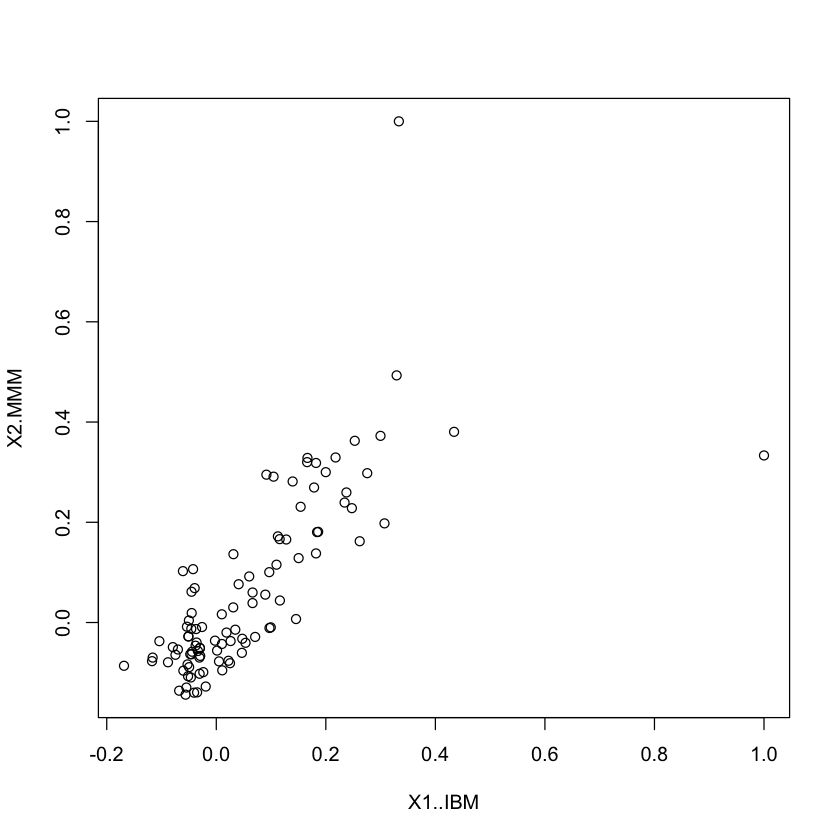

In [11]:
plot(cormat)

**1. Conclusion**

They are dependent on each other. We reject the assumption that stocks' returns are independent of each other.

**2. Reasons**   

According to the correlation picture above, we absolute values of **12** stocks pairs' correlations are more than 0.7,  which indicates they are strongly correlated to each other.

Moreover, the correlations of **110** stocks pairs are more than 0.4. 

Thus, we conclude that the stocks' returns are **dependent** on each other and reject the assumption that they are independent. 


## 6. Taylor Method Under Normal Assumption

The p-values we get are $U(0,1)$ distributed under the assumption that the stocks' returns are normally distributed.

For all the methods above, the power can be improved if we can reduce the number m of hypotheses. Let say there are $m_\alpha$ out of m p-values that are less than $\alpha$. 

Clearly they are not $U(0,1)$ distributed under $H_0$ any more as they are always less than $\alpha$. We need to first compute the conditional p-values, and then apply step-down procedure to the conditional p-values, instead of the original p-values.

We use Taylor method to get the conditional p-values under the assumption that p-values are $U(0,1)$ distributed. 

> For more information about Taylor Method, please see [Taylor et al. (2014)](https://pdfs.semanticscholar.org/f775/729a65da59b2e503cb2e7479f9a2a681fa51.pdf).



**Motivation for Testing Independent Assumption**


As we have rejected the assumption that stocks' returns are independent of each other, the above procedure is only under the assumption that stocks' returns are normally distributed. Next, I will explain why we test independent assumption.

As noted in the lectures, to get conditional p-values by Taylor method, we first need to convert original p-values to vector $y$, where:

$$ \mathbf {y} \ \sim \ {\mathcal {N}}({\boldsymbol {\theta }},\,{\boldsymbol {\Sigma }})$$


As we don't know whether the p-values are independent of each other or not, therefore we don't know $\Sigma$ in this distribution.


If the stocks are independent of each other, then we can conclude that p-values are also independent of each other. 
Then, as the vector $y$ is derived from p-values, we can use 

$$ \Sigma = I $$ 

as $y$ 's covariance matrix. So we need to test the independent assumption to see whether we can use this convenient conclusion.


However, we cannot use it as we reject the independent assumption. In order to use Taylor Method, we will use hybrid resampling to estimate $\Sigma$ in Section 6.3.


### 6.1 Source Code for Tayler Method


**1.**


$$ F^{[a,b]}_{\mu, \sigma^2}(x) = \frac{\Phi((x-\mu)/\sigma) -  \Phi((a-\mu)/\sigma)}{\Phi((b-\mu)/\sigma) -  \Phi((a-\mu)/\sigma)}$$

In [12]:
Ffun = function(a, b, mu, si, x){
    xs = (x - mu)/si
    as = (a - mu)/si
    bs = (b - mu)/si
    
    f = function(y) (1/y-1/y^3+3/y^5-15/y^7);
    
    if (as > 4 & bs > 4){
        F = 1 - (exp((as^2-bs^2)/2)*f(bs) - exp((as^2-xs^2)/2)*f(xs))/(exp((as^2-bs^2)/2)*f(bs) - f(as))
    }
    else if (as < -4 & bs < -4){
        F = ( exp((bs^2-xs^2)/2)*f(-xs) - exp((bs^2-as^2)/2)*f(-as))/( f(-bs)-exp((bs^2-as^2)/2)*f(-as))
    }
    else{
        denom = pnorm(bs)-pnorm(as)
        if (denom < 0.00001){
            F <- (xs-as)/(bs-as)
        }
        else{
            F <- (pnorm(xs)-pnorm(as))/denom
        }
    }
    return(F)
}

**2.**

$$ \mathbf {y} \ \sim \ {\mathcal {N}}({\boldsymbol {\theta }},\,{\boldsymbol {\Sigma }})$$

$$ \rho = \frac{\Gamma\Sigma v}{v^{T}\Sigma v}$$

$$V^{lo} = \max_{j:\rho_{j}>0} \frac{\mu_j - (\Gamma y)_{j} + \rho_{j}v^{T}y}{\rho_{j}}$$

$$V^{up} = \min_{j:\rho_{j}<0} \frac{\mu_j - (\Gamma y)_{j} + \rho_{j}v^{T}y}{\rho_{j}}$$

$$\tilde{p} = 1 − F^{[V^{lo}, V^{up}]}_{0, v^{T}\Sigma v}(v^{T}y)$$


$\tilde{p}$ are the taylor p-values we want to get.

In [13]:
GetTaylerPValue <- function(Zs, Sigma, u, v, Gamma){
    
    # calculate rho
    tmp = Sigma%*%v
    A = v%*%tmp
    rho = (Gamma%*%tmp)/A[1,1]
    
    # calculate Vs in order to find Vup, Vlo
    Vs = (u- (Gamma%*%Zs) + rho*sum(v*Zs))/rho
    if (sum(rho<0)==0){
        Vup <- Inf
    } 
    else{
        Vup <- min(Vs[rho<0])
    }
    
    if (sum(rho>0)==0){
        Vlo <- -Inf
    } 
    else {
        Vlo <- max(Vs[rho>0])
    }
    # here we have Vlo, Vup, v, 
    a  = Vlo
    b  = Vup
    mu = 0
    si = A[1,1]
    x  = sum(v*Zs)
    p_tmp = Ffun(a, b, mu, si, x)
    
    p_tayler = 1- p_tmp
    #p_tayler = p_tmp
    return(p_tayler)
}

**3. **

Combine them together

In [14]:
# Zs is normal distributed, transformed from p-value, well sorted
# must be sorted before taken as the input
# under Zs ~ N(theta, Sigma)
# here we need to test theta, so, don't take it as the input

Taylor <- function(Zs, Sigma){
    # length of Zs
    # Zs = sort(rnorm(100), decreasing = T)
    len = length(Zs)
    
    alpha = 0.05
    Z_alpha = qnorm(alpha, lower.tail = F)
    
    # the number that bigger than the desired value
    rlen = sum(Zs >= Z_alpha )
    
    # Get Gamma Matrix
    Gamma = rep(1,len)
    Gamma = diag(Gamma)
    Gamma = Gamma[1:rlen,]
    
    # Get u vector 
    u = rep(Z_alpha, rlen) 
    
    Taylor_PValues <- rep(0,rlen)
    for (idx in 1:rlen){
        v = rep(0,len)
        v[idx] = 1
        Taylor_PValues[idx] = GetTaylerPValue(Zs, Sigma, u, v, Gamma)
    }
    return(sort(Taylor_PValues))
}

### 6.2 Prepare the Data Where p-values are Bigger Than 0.05

In [15]:
result = result[,c(1,2,3)]
result[1:15,]

StockName,JenIndex,pvalue
X23.BA,0.00183640,0.00212794
X66.DXC,0.00245666,0.00937999
X78.FMC,0.00255816,0.00999499
X86.GD,0.00114604,0.02861545
X97.HUM,0.00138602,0.03408030
X12.AAPL,0.00108710,0.04246088
X44.C,0.00132215,0.04327062
X74.FDX,0.00117197,0.04756679
X81.FTV,0.00097895,0.05328660
X72.FB,0.00114711,0.05328791


Get the vector $y$. (In this context, it is `Zs`)

The elements in vector $y$ are decreasing.

In [16]:
Zs = qnorm(result$pvalue, lower.tail = F)
result$Zs = Zs
result_Taylor = result[result$Zs >= qnorm(alpha, lower.tail = F), ]
result_Taylor

StockName,JenIndex,pvalue,Zs
X23.BA,0.00183640,0.00212794,2.858546
X66.DXC,0.00245666,0.00937999,2.350266
X78.FMC,0.00255816,0.00999499,2.326536
X86.GD,0.00114604,0.02861545,1.901543
X97.HUM,0.00138602,0.03408030,1.823944
X12.AAPL,0.00108710,0.04246088,1.722816
X44.C,0.00132215,0.04327062,1.713932
X74.FDX,0.00117197,0.04756679,1.668918


### 6.3 Use Resampling Method to Find the Covariance Matrix of Zs: Sigma

In [17]:
# resampling to find covariance matrix of z
Z <- c()
x <- part1t[,1]
n <- length(x)
numBoot = 200
for (i in 2:101) {
    y<-part1t[,i]
    l <- lm(y~x)
    epshat <- residuals(l)
    z<-c()
    for (b in 1:numBoot) {
        y.b <- predict(l) + sample(epshat,n,replace = T)
        lb <- lm(y.b~x)
        s <- summary(lb)
        tp <- s$coefficients[1,3]
        pvalue <- pt(tp,df=249,lower.tail = FALSE)
        z[b] <- qnorm(pvalue,lower.tail = F)
    }
    Z<-cbind(Z,z)
}

dim(Z)

[1] 200 100

In [18]:
Zs = Zs[Zs!=-Inf]

#Sigma = diag(length(Zs))
Sigma <- cov(Z)
dim(Sigma)

[1] 100 100

### 6.4 Calculate and Evaluate Taylor Method p-values

In [19]:
taylor_pvalue = Taylor(Zs, Sigma)
taylor_pvalue

[1] 0.08104707 0.08557088 0.36833167 0.47334063 0.63691264 0.79188868 0.87826535
[8] 0.93394798

In [20]:
m = length(taylor_pvalue)
alpha = 0.05
taylor_P <- c()
for (k in 1:m) {
  taylor_P[k]<- alpha/(m+1-k)
}

taylor_P

[1] 0.006250000 0.007142857 0.008333333 0.010000000 0.012500000 0.016666667
[7] 0.025000000 0.050000000

In [21]:
result_Taylor$taylor_pvalue = taylor_pvalue
result_Taylor = arrange(result_Taylor, taylor_pvalue)
result_Taylor[, 5]  <- as.numeric(as.character( result_Taylor[, 5] ))
result_Taylor$taylor_P = taylor_P
result_Taylor$LessEqP = taylor_pvalue <= taylor_P
result_Taylor

StockName,JenIndex,pvalue,Zs,taylor_pvalue,taylor_P,LessEqP
X23.BA,0.00183640,0.00212794,2.858546,0.08104707,0.006250000,FALSE
X66.DXC,0.00245666,0.00937999,2.350266,0.08557088,0.007142857,FALSE
X78.FMC,0.00255816,0.00999499,2.326536,0.36833167,0.008333333,FALSE
X86.GD,0.00114604,0.02861545,1.901543,0.47334063,0.010000000,FALSE
X97.HUM,0.00138602,0.03408030,1.823944,0.63691264,0.012500000,FALSE
X12.AAPL,0.00108710,0.04246088,1.722816,0.79188868,0.016666667,FALSE
X44.C,0.00132215,0.04327062,1.713932,0.87826535,0.025000000,FALSE
X74.FDX,0.00117197,0.04756679,1.668918,0.93394798,0.050000000,FALSE


In [22]:
spvalue = result_Taylor$taylor_pvalue
m = length(spvalue)

# Holm's step-down procedure
StepDown = rep("Accept", m)

for (k in 1:m) {
    if (spvalue[k] > alpha/(m+1-k)) {
        break
    }
    StepDown[k] = 'Reject'
}

# Hochberg's Step-up Procedure
StepUp = rep("Reject", m)

for (k in 1:m) {
    if (spvalue[k] <= alpha/(m+1-k)) {
        break
    }
    StepUp[k] = 'Accept'
}

result_Taylor$StepDown = StepDown
result_Taylor$StepUp   = StepUp
result_Taylor

write.csv(result_Taylor, 'result_normal_Taylor.csv')

StockName,JenIndex,pvalue,Zs,taylor_pvalue,taylor_P,LessEqP,StepDown,StepUp
X23.BA,0.00183640,0.00212794,2.858546,0.08104707,0.006250000,FALSE,Accept,Accept
X66.DXC,0.00245666,0.00937999,2.350266,0.08557088,0.007142857,FALSE,Accept,Accept
X78.FMC,0.00255816,0.00999499,2.326536,0.36833167,0.008333333,FALSE,Accept,Accept
X86.GD,0.00114604,0.02861545,1.901543,0.47334063,0.010000000,FALSE,Accept,Accept
X97.HUM,0.00138602,0.03408030,1.823944,0.63691264,0.012500000,FALSE,Accept,Accept
X12.AAPL,0.00108710,0.04246088,1.722816,0.79188868,0.016666667,FALSE,Accept,Accept
X44.C,0.00132215,0.04327062,1.713932,0.87826535,0.025000000,FALSE,Accept,Accept
X74.FDX,0.00117197,0.04756679,1.668918,0.93394798,0.050000000,FALSE,Accept,Accept




**1. Conclusion**

After using Taylor method, we accept all null hypotheses with $FWER \leq 0.05 $.

**2. Analysis**

We use conditional p-values because it has more powers for testing. We use Taylor method to calculate these conditional p-values: `taylor_pvalue`. 

The result is: we still accept all null hypotheses with $FWER \leq 0.05 $. That is to say, we still cannot find any stocks with positive Jensen index when controlling $FWER \leq 0.05 $.



## 7. Tests of  Normality of Stock Returns

**1**  The above result is derived from the assumption that these stocks' returns are **Independent** and **Normally** Distributed. We have rejected the assumption that they are independent of each other. The taylor method is based on the assumption that the stocks' returns are normally distributed. We also need to test whether this assumptions holds.

**2** As the dataset is too big, 10 stocks are randomly selected to do the test. We will test this assumption by the following two methods: method  **QQ-Plot** and method **Shapiro-Wilk test**.

In [23]:
# prepare the ramdomly selected stocks

index <- sample(2:101, 10, replace = F)
x <- part1t[,1]

### 7.1 QQ-Plot

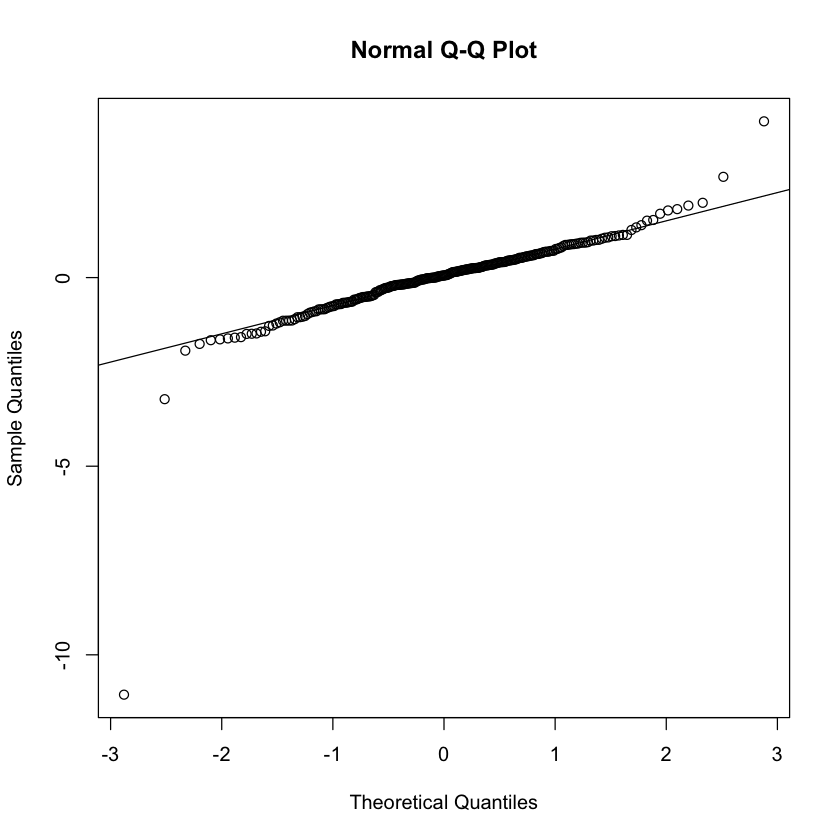

In [24]:
# test for normal by qqplot

stdres <- c()

l1 <- lm(part1t[,index[1]] ~ x)
qqnorm(studres(l1))
qqline(studres(l1))
stdres <- cbind(stdres,studres(l1))

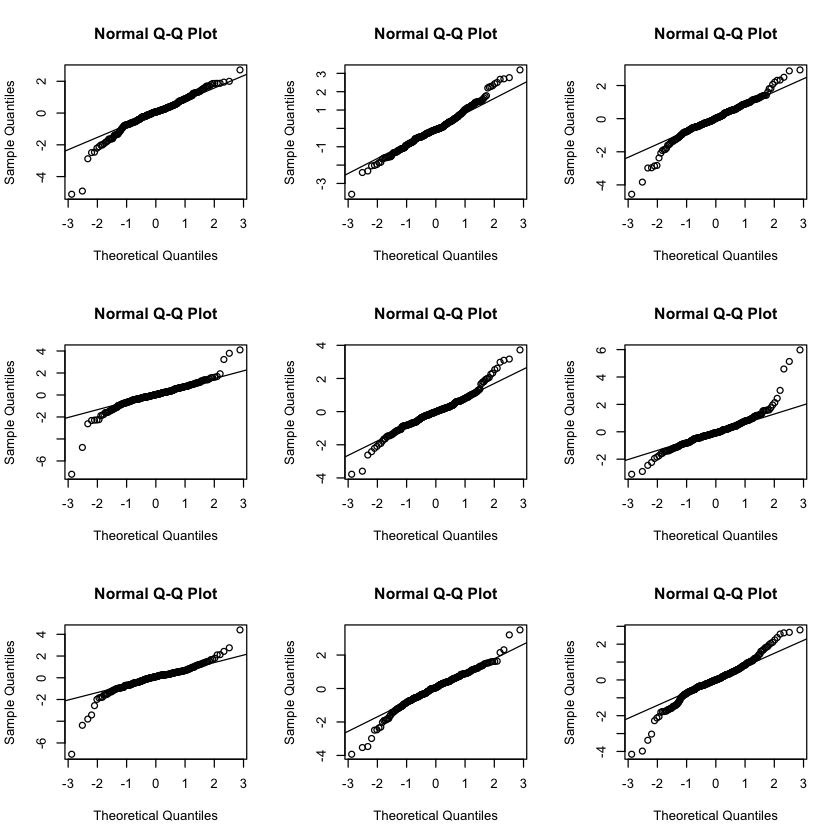

In [25]:
par(mfrow = c(3,3))

l2 <- lm(part1t[,index[2]]~x)
qqnorm(studres(l2))
qqline(studres(l2))
stdres<-cbind(stdres,studres(l2))

l3 <- lm(part1t[,index[3]]~x)
qqnorm(studres(l3))
qqline(studres(l3))
stdres<-cbind(stdres,studres(l3))

l4 <- lm(part1t[,index[4]]~x)
qqnorm(studres(l4))
qqline(studres(l4))
stdres<-cbind(stdres,studres(l4))

l5 <- lm(part1t[,index[5]]~x)
qqnorm(studres(l5))
qqline(studres(l5))
stdres<-cbind(stdres,studres(l5))

l6 <- lm(part1t[,index[6]]~x)
qqnorm(studres(l6))
qqline(studres(l6))
stdres<-cbind(stdres,studres(l6))

l7 <- lm(part1t[,index[7]]~x)
qqnorm(studres(l7))
qqline(studres(l7))
stdres<-cbind(stdres,studres(l7))

l8 <- lm(part1t[,index[8]]~x)
qqnorm(studres(l8))
qqline(studres(l8))
stdres<-cbind(stdres,studres(l8))

l9 <- lm(part1t[,index[9]]~x)
qqnorm(studres(l9))
qqline(studres(l9))
stdres<-cbind(stdres,studres(l9))

l10 <- lm(part1t[,index[10]]~x)
qqnorm(studres(l10))
qqline(studres(l10))
stdres<-cbind(stdres,studres(l10))


From above graphs, we can conclude that the normal assumption is rejected.



### 7.2 Shapiro–Wilk test



**1** The Shapiro–Wilk test tests the null hypothesis 

that **a sample **$x_1$, ..., $ x_n$**came from a normally distributed population.**



**2** The test statistic is

$$ {\displaystyle W={\left(\sum _{i=1}^{n}a_{i}x_{(i)}\right)^{2} \over \sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}},}$$


Where

* $x_{{(i)}}$ (with parentheses enclosing the subscript index i) is the ith order statistic, 

    i.e., the ith-smallest number in the sample;

    ​

* $\overline {x}=\left(x_{1}+\cdots +x_{n}\right)/n$ is the sample mean;



* the constants $a_{i}$ are given by 

  $$   {\displaystyle (a_{1},\dots ,a_{n})={m^{\mathsf {T}}V^{-1} \over (m^{\mathsf {T}}V^{-1}V^{-1}m)^{1/2}}} $$

  where 

  $$  m=(m_{1},\dots ,m_{n})^{{{\mathsf  {T}}}}\,$$

  and $ m_{1},\ldots ,m_{n}$ are the expected values of the order statistics of independent and identically distributed random variables sampled from the standard normal distribution, and $ V$ is the covariance matrix of those order statistics.



**3** In R, we could use `shapiro.test` to test whether a sample is derived from normal distribution, by:
```R
> shapiro.test(rnorm(100, mean = 5, sd = 3))

	Shapiro-Wilk normality test

data:  rnorm(100, mean = 5, sd = 3)
W = 0.97084, p-value = 0.02563
```


In [26]:
# shapiro test
rej <-c()
for (i in 1:10) {
    sh <- shapiro.test(stdres[,i])
    rej[i] <-(sh$p.value<=0.05) 
}

rej

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

---

**Conclusion**


In this test, the normal assumption is rejected,


**Analysis**

According to the Q-Q plots, we find that in the middle part of plots, almost every sample point is located along the straight line. However, the sample points around head and tail are not located along the line. So the sample distribution is not normal.

The Shapiro–Wilk test also reject the assumption that the stock returns are normally distributed.


**Next**

As the normal assumption is not held, we cannot get the p-values by T statistics derived from linear regressions, as we did in the very beginning.  

Therefore, we need to find ways to calculate these p-values without using normal assumption. In next section, we will use **hybrid resampling method** to simulate the empirical distribution of a certain test statistic and then get the p-values.

## 8. Hybrid Resampling

### 8.1 Source Code for Hybrid Resampling


In [27]:
GetBootStat <- function(b, Xbeta_theta, epshat, n){
    y.b <- Xbeta_theta + sample(epshat, n, replace=T)
    thetahat.b <- lm(y.b ~ part1t[,1])$coefficients[1]
    return(thetahat.b)
}

Hybrid <- function(idx, numBoot, part1t){
    y <- part1t[,idx]
    # beta_hat_0
    thetahat <- lm( y ~ part1t[,1])$coefficients[1]
    That <- thetahat - theta
    
    l <- lm(y~part1t[,1]-1)
    epshat <- residuals(l)
    Xbeta_theta <- predict(l)
    
    TS.dist <- rep(0, numBoot)
    
    for (b in 1:numBoot){
        TS.dist[b] = GetBootStat(b, Xbeta_theta, epshat, n)
    }
    
    qua <- seq(0,1,0.01)
    for (j in 1:length(qua)) {
        if (That <= quantile(TS.dist,qua[j])){
            pvalue <- 1-qua[j]
            break
        }
    }
    
    result = list(pvalue, thetahat, TS.dist)
    return(result)
}

### 8.2 Use Hybrid Resample to Find p-values

In [28]:
numBoot = 200
theta   = 0
hybrid_pvalue  <- c()
n <- length(part1t[,1])

for (idx in 2:101){
    pvalue  = Hybrid(idx, numBoot, part1t)[[1]]
    hybrid_pvalue[idx-1] = pvalue
}

hybrid_pvalue

[1] 0.53 0.48 0.50 0.52 0.54 0.49 0.55 0.44 0.53 0.56 0.53 0.49 0.59 0.55 0.42
 [16] 0.44 0.47 0.53 0.55 0.48 0.53 0.49 0.51 0.51 0.54 0.52 0.56 0.47 0.55 0.52
 [31] 0.50 0.53 0.53 0.49 0.52 0.51 0.44 0.49 0.51 0.54 0.48 0.44 0.41 0.44 0.42
 [46] 0.49 0.49 0.49 0.50 0.50 0.48 0.57 0.43 0.50 0.46 0.51 0.51 0.47 0.48 0.49
 [61] 0.47 0.49 0.45 0.54 0.54 0.55 0.48 0.51 0.48 0.46 0.57 0.52 0.48 0.48 0.49
 [76] 0.50 0.52 0.50 0.47 0.52 0.51 0.49 0.51 0.49 0.48 0.57 0.50 0.48 0.49 0.43
 [91] 0.50 0.53 0.49 0.41 0.51 0.46 0.47 0.53 0.57 0.47

### 8.3 Use Step-Up and Step-Down to Reject Null Hypotheses

In [29]:
result_Hybrid = result[, c(1,2,3)]
result_Hybrid$hybrid_pvalue = hybrid_pvalue
result_Hybrid = arrange(result_Hybrid, hybrid_pvalue)
result_Hybrid[,4] = as.numeric(as.character( result_Hybrid[, 4] ))
result_Hybrid$P = P
result_Hybrid$LessEqP = result_Hybrid$hybrid_pvalue <= result_Hybrid$P
result_Hybrid$LessEqP

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

As all `hybrid_pvalues` are bigger than the corresponding  $  \frac{0.05}{(m + 1 - k)}$, based on the results of former tests, we conclude that **All the Null Hypotheses are Accepted** with $FWER \leq 0.05$.

In [30]:
result_Hybrid$StepDown = rep('Accept', length(result_Hybrid[,1]))
result_Hybrid$StepUp = rep('Accept', length(result_Hybrid[,1]))
result_Hybrid[1:20,]
write.csv(result_Hybrid, 'result_Hyrid.csv')

StockName,JenIndex,pvalue,hybrid_pvalue,P,LessEqP,StepDown,StepUp
X99.ILMN,0.00114114,0.24926910,0.41,0.00050000,FALSE,Accept,Accept
X28.CPB,-0.00097329,0.90421523,0.41,0.00050505,FALSE,Accept,Accept
X76.FISV,0.00077364,0.07510276,0.42,0.00051020,FALSE,Accept,Accept
X29.COF,0.00054748,0.26713880,0.42,0.00051546,FALSE,Accept,Accept
X2.MMM,0.00013464,0.37318911,0.43,0.00052083,FALSE,Accept,Accept
X17.BLL,-0.00057101,0.82996041,0.43,0.00052632,FALSE,Accept,Accept
X74.FDX,0.00117197,0.04756679,0.44,0.00053191,FALSE,Accept,Accept
X70.EL,0.00097510,0.08477444,0.44,0.00053763,FALSE,Accept,Accept
X9.AEE,0.00046589,0.21332149,0.44,0.00054348,FALSE,Accept,Accept
X83.BEN,0.00063319,0.24854325,0.44,0.00054945,FALSE,Accept,Accept


As we reject the normal assumption in normality test, we need to find ways to calculate these p-values without using normal assumption. 

In this section, we use **hybrid resampling method** to simulate the empirical distribution of a test statistic and then get the new p-values. By evaluating these p-values, we want to see whether the result will be different or not. 


However, the result shows that even if we resample the data and calculate hybrid p-values, we still accept all hypotheses with $FWER \leq 0.05$. That is, we find no stocks with positive Jensen index when controlling $FWER \leq 0.05$

## 9. Answer the Questions

**(1)** **Please identify the stocks with positive Jensen index with $FWER \leq 0.05$.**


None of these stocks have Positive Jenson Index. We cannot identify the stocks with positive Jensen index with controlling $FWER \leq 0.05$, because for any methods we used, we accept all the null hypotheses.

**(2)** **Explain why the method(s) you proposed in (a) can control $FWER \leq 0.05$.**

We use Holm’s step-down procedure and Hochberg’s step-up procedure to control FWER, the reason why these two methods can control FWER is shown in the previous parts of this report.
